# Sentiment Analysis

# All Basics of NLP will be covered

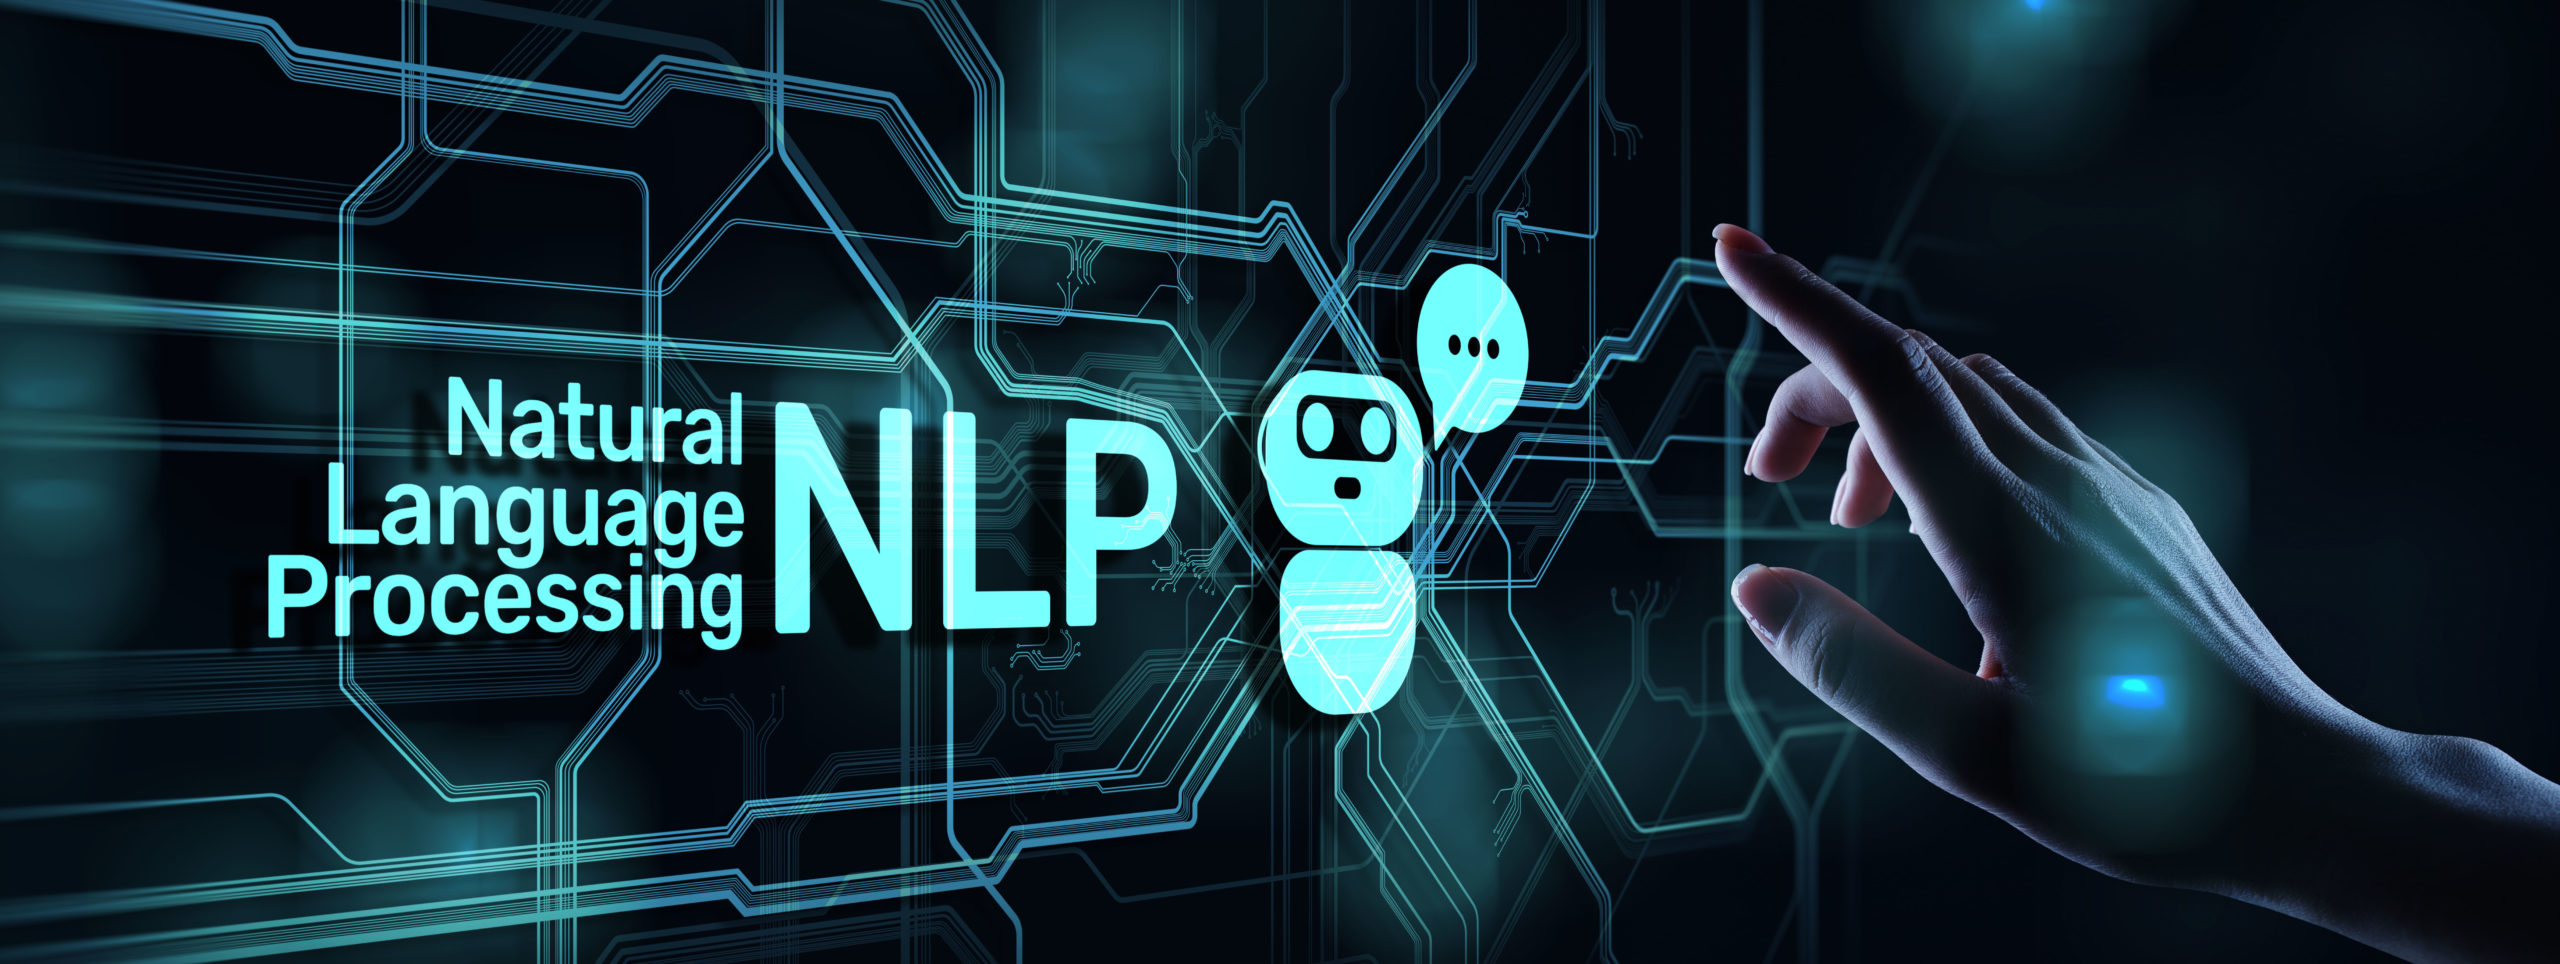

## What is NLP?

It is a branch of computer science which is concerned about giving computers the ability to understand text and spoken words in much the same way human beings can.

Examples:
1. Search Autocorrect and Autocomplete
2. Language Translator
3. Chatbots
4. Voice Assistants
5. Grammar Checkers


Brief overview
We will classify the sentiments of the movie review

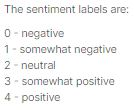

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import re

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vikrama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Reading data

In [2]:
train=pd.read_csv('F:/learning/kaggle/Sentiment Analysis/train/train.tsv',sep='\t')
test=pd.read_csv('F:/learning/kaggle/Sentiment Analysis/test/test.tsv',sep='\t')

In [3]:
train.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [4]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [5]:
print(train.shape,test.shape)

(156060, 4) (66292, 3)


## EDA

Lets analyze the positive and positive sentiment here

Seperating only the positive comments

### Word cloud

Visualization format to highlight important textual data

In [52]:
only_positive=train[train['Sentiment']==4]['Phrase']

In [53]:
only_positive

63        This quiet , introspective and entertaining in...
66        quiet , introspective and entertaining indepen...
74                                             entertaining
77                                         is worth seeking
117       A positively thrilling combination of ethnogra...
                                ...                        
155946                              is laughingly enjoyable
155955    a unique culture that is presented with univer...
155961                                with universal appeal
156007    really do a great job of anchoring the charact...
156010    a great job of anchoring the characters in the...
Name: Phrase, Length: 9206, dtype: object

In [54]:
positives=' '.join(only_positive)

In [55]:
stopwordss=set(STOPWORDS)

In [56]:
wordcloud1=WordCloud(width=1000,height=500,stopwords=stopwordss).generate(positives)

(-0.5, 999.5, 499.5, -0.5)

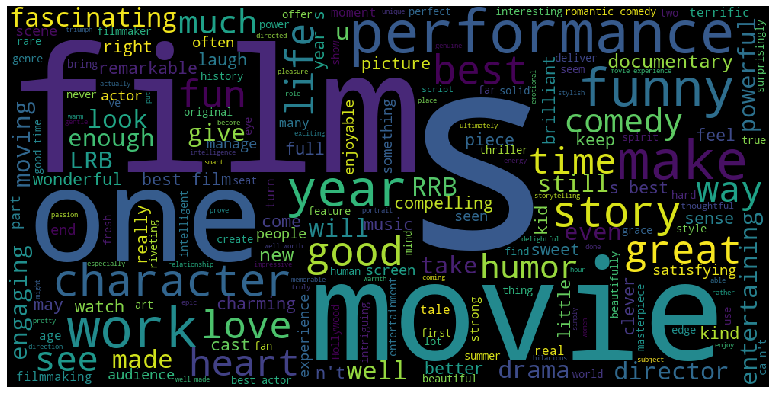

In [57]:
plt.figure(figsize=(15,7))
plt.imshow(wordcloud1)
plt.axis('off')

## Check for Missing Values

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


## Basics of NLP

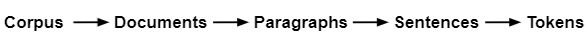

To begin NLP, we have to start with three processes:
    1. Removing non alpha values
    2. Tokenization
    3. Normalization

### Tokenization

The process of splitting the sentences into smaller unit i.e. tokens

The most common type of tokenization is white space tokenization

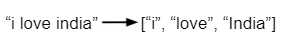

### Normalization

Tokens have two parts
1. Morpheme (Base word)
2. Inflection unit (Prefix and suffix)
 Here normalization is a process of converting tokens into morphemes

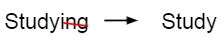

One method of normalization is lemmatization. 

Lemmatization will convert the token into morpheme rejecting inflection unit as shown above.

In [8]:
def clean_sentences(df):
    reviews=[]
    for sentence in df['Phrase']:
#         remove non alphabetic value
        review_text = re.sub("[^a-zA-Z]"," ", sentence)
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
#         print(words)
        #lemmatize each word to its lemma
        lemmatizer = WordNetLemmatizer()
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
        
        reviews.append(lemma_words)
    
    return(reviews)

In [9]:
train_sentences = clean_sentences(train)
test_sentences = clean_sentences(test)

print(len(train_sentences))
print(len(test_sentences))

156060
66292


In [10]:
print(train['Phrase'][12210])
print(' '.join(train_sentences[12210]))

sweet , laugh-a-minute crowd pleaser
sweet laugh a minute crowd pleaser


## Converting intergers to binary class matrix

In [11]:
from keras.utils import to_categorical

target = train.Sentiment.values
y_target = to_categorical(target)

# number of numerical values exist in y_target's column
num_classes = y_target.shape[1]

Using TensorFlow backend.


In [23]:
y_target

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [12]:
print(num_classes)

5


## Splitting train data into train and validation set

Before moving further have some basic foundation in neural networks 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val, y_train, y_val = train_test_split(train_sentences,
                                                  y_target,
                                                  test_size = 0.2,
                                                  stratify = y_target)

### Counting number of unique words

In [ ]:
unique_words = set()
len_max = 0
for sent in X_train:
    print(sent)
    unique_words.update(sent)
    if(len_max < len(sent)):
        len_max = len(sent)
print(unique_words)
# length of the list of unique_words 
print('Number of vocabs: ', len(list(unique_words)))
print('Max length of text is: ', len_max)

## Word Embedding

Its a three step procedure:
    1. Encoding
    2. Padding
    3. Embedding

In [18]:
vocab_size = len(list(unique_words))
embedding_dim = 300
max_length = len_max
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [19]:
tokenizer = Tokenizer(num_words = vocab_size,
                      oov_token = oov_tok,
                      char_level = False)

tokenizer.fit_on_texts(list(X_train))

# Training
X_train = tokenizer.texts_to_sequences(X_train)
print(list(X_train))
X_train = pad_sequences(X_train,
                        maxlen = max_length,
                        padding = padding_type,
                        truncating = trunc_type)

# Validation
X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val,
                      maxlen = max_length,
                      padding = padding_type,
                      truncating = trunc_type)

# Testing
X_test = tokenizer.texts_to_sequences(test_sentences)
X_test = pad_sequences(X_test,
                       maxlen = max_length,
                       padding = padding_type,
                       truncating = trunc_type)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
X_train.shape

(124848, 48)

In [21]:
print(len_max)

48


In [22]:
X_train

array([[  12,   58,  574, ...,    0,    0,    0],
       [3509,    5, 1281, ...,    0,    0,    0],
       [5172, 6753,    8, ...,    0,    0,    0],
       ...,
       [ 570,  117,  213, ...,    0,    0,    0],
       [   2, 2884, 1149, ...,    0,    0,    0],
       [8124,    6,    2, ...,    0,    0,    0]])

In [24]:
print("X_training shape   : ",X_train.shape)
print("X_validation shape : ",X_val.shape)
print("X_testing shape    : ",X_test.shape)

X_training shape   :  (124848, 48)
X_validation shape :  (31212, 48)
X_testing shape    :  (66292, 48)


## Structuring a NN Model

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout = 0.8, recurrent_dropout=0.8, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout = 0.5, recurrent_dropout=0.5, return_sequences=False)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 48, 300)           4121100   
_________________________________________________________________
bidirectional (Bidirectional (None, 48, 256)           439296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 4,741,905
Trainable params: 4,741,905
Non-trainable params: 0
______________________________________________

In [26]:
X_train

array([[  12,   58,  574, ...,    0,    0,    0],
       [3509,    5, 1281, ...,    0,    0,    0],
       [5172, 6753,    8, ...,    0,    0,    0],
       ...,
       [ 570,  117,  213, ...,    0,    0,    0],
       [   2, 2884, 1149, ...,    0,    0,    0],
       [8124,    6,    2, ...,    0,    0,    0]])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs = 5,
                    batch_size = 256,
                    verbose = 0,
                    )

In [ ]:
pred = np.argmax(model.predict(X_test),axis=-1)

# Recap

### 1. Remove non alpha

### 2. Convert to lowercase

### 3.Tokenize

### 4. Encode

### 5. Padding

### 6. Embedding

### 7. Create a Model

# THE END